In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv(r"C:\Users\Vinod Reddy\Documents\projects\Advance Real Estate Price Prediction\data\Bengaluru_House_Data.csv")
df=data.copy()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df=df.drop(["society","availability"],axis=1)

In [6]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df["size"]=df["size"].str.split(" ").str[0].str.strip().astype(float)

In [9]:
df.describe()

,size,bath,balcony,price
count,13304.000000,13247.000000,12711.000000,13320.000000
mean,2.803743,2.692610,1.584376,112.565627
std,1.294974,1.341458,0.817263,148.971674
min,1.000000,1.000000,0.000000,8.000000
25%,2.000000,2.000000,1.000000,50.000000
50%,3.000000,2.000000,2.000000,72.000000
75%,3.000000,3.000000,2.000000,120.000000
max,43.000000,40.000000,3.000000,3600.000000


In [10]:
df.dtypes

area_type      object
location       object
size          float64
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [11]:
def imputation(df,x):
    df[x]=df[x].fillna(df[x].median())
    return df[x]

In [12]:
df["size"]=imputation(df,"size")
df["bath"]=imputation(df,"bath")
df["balcony"]=imputation(df,"balcony")

In [13]:
df.isnull().sum()

area_type     0
location      1
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00


In [16]:
df.duplicated().sum()

692

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(12627, 7)

In [19]:
df["total_sqft"].unique()[1:100]

array(['2600', '1440', '1521', '1200', '1170', '2732', '3300', '1310',
       '1020', '1800', '2785', '1000', '1100', '2250', '1175', '1180',
       '1540', '2770', '600', '1755', '2800', '1767', '510', '1250',
       '660', '1610', '1151', '1025', '2100 - 2850', '1075', '1760',
       '1693', '1925', '700', '1070', '1724', '1290', '1143', '1296',
       '1254', '1330.74', '970', '1459', '800', '869', '1270', '1670',
       '2010', '1185', '1600', '3010 - 3410', '1500', '1407', '840',
       '4395', '845', '5700', '1160', '3000', '1140', '1220', '1350',
       '1005', '500', '1358', '1569', '1240', '2089', '1206', '1150',
       '2511', '460', '4400', '1660', '2957 - 3450', '1326', '1325',
       '1499', '1665', '708', '1060', '710', '1450', '2894', '1330',
       '2502', '650', '2400', '1007', '966', '1630', '1640', '782',
       '1260', '1413', '1116', '1530', '3700', '2497'], dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
sample=df[~df["total_sqft"].apply(is_float)]
sample.head(30)

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4.0,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,Devanahalli,4.0,3010 - 3410,2.0,2.0,192.000
81,Built-up Area,Hennur Road,4.0,2957 - 3450,2.0,2.0,224.500
122,Super built-up Area,Hebbal,4.0,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2.0,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,Sarjapur,2.0,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,KR Puram,2.0,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,Devanahalli,3.0,1520 - 1740,2.0,2.0,74.820
410,Super built-up Area,Kengeri,1.0,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,Hennur Road,2.0,1195 - 1440,2.0,0.0,63.770


In [22]:
sample[~sample["total_sqft"].str.contains("-")]

,area_type,location,size,total_sqft,bath,balcony,price
410,Super built-up Area,Kengeri,1.0,34.46Sq. Meter,1.0,0.0,18.50
648,Built-up Area,Arekere,9.0,4125Perch,9.0,2.0,265.00
775,Built-up Area,Basavanagara,1.0,1000Sq. Meter,2.0,1.0,93.00
872,Super built-up Area,Singapura Village,2.0,1100Sq. Yards,2.0,2.0,45.00
1019,Plot Area,Marathi Layout,1.0,5.31Acres,1.0,0.0,110.00
1086,Plot Area,Narasapura,2.0,30Acres,2.0,2.0,29.50
1400,Super built-up Area,Chamrajpet,9.0,716Sq. Meter,9.0,1.0,296.00
1712,Plot Area,Singena Agrahara,3.0,1500Sq. Meter,3.0,1.0,95.00
1743,Super built-up Area,Hosa Road,3.0,142.61Sq. Meter,3.0,1.0,115.00
1821,Plot Area,Sarjapur,3.0,1574Sq. Yards,3.0,1.0,76.00


In [23]:
import re
def numbers(string):
    pattern = r'(\d+(\.\d+)?)'
    match = re.search(pattern, string)
    return float(match.group(0))

In [24]:
numbers("300Sq. Yards")

300.0

In [25]:
def to_float(x):
    prices=x.split("-")
    if(len(prices)==2):
        avg=(float(prices[0].strip())+float(prices[1].strip()))/2
        return avg
    try:
        return float(x)
    except:
        if("Sq. Meter" in x):
            return numbers(x)*10.76
        if("Sq. Yards" in x):
            return numbers(x)*3
        if("Acres" in x):
            return numbers(x)*43560
        if("Guntha" in x):
            return numbers(x)*1089
        if("Grounds" in x):
            return numbers(x)*2400
        if("Perch" in x):
            return numbers(x)*272.5
        if("Cent" in x):
            return numbers(x)*435.6
        return None


In [26]:
df["total_sqft"]=df["total_sqft"].apply(to_float)

In [27]:
df["price_per_sqft"]=df["price"]*100000/df["total_sqft"]
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


In [28]:
df["location"]=df["location"].apply(lambda x: x.strip())
df["location"]=df["location"].apply(lambda x: x.lower())

In [29]:
# df["location"]=df["location"].apply(lambda x: x.strip())
locations=df.groupby("location")["location"].agg("count").sort_values(ascending=False)
locations

location
whitefield               515
sarjapur  road           368
electronic city          282
thanisandra              232
kanakpura road           230
                        ... 
kamanahalli main road      1
kamdhenu nagar             1
1 giri nagar               1
kanakadasa layout          1
zuzuvadi                   1
Name: location, Length: 1283, dtype: int64

In [30]:
locations_less_10 = locations[locations<=10]
locations_less_10

location
sector 1 hsr layout      10
beml layout              10
kalkere                  10
ganga nagar              10
nagappa reddy layout     10
                         ..
kamanahalli main road     1
kamdhenu nagar            1
1 giri nagar              1
kanakadasa layout         1
zuzuvadi                  1
Name: location, Length: 1051, dtype: int64

In [31]:
df["location"]=df["location"].apply(lambda x: "Other" if x in locations_less_10 else x)

In [32]:
len(df["location"].unique())

233

In [33]:
df

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,electronic city phase ii,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,chikka tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,green glen layout,3.0,1715.0,3.0,3.0,112.00,6530.612245
13315,Built-up Area,whitefield,5.0,3453.0,4.0,0.0,231.00,6689.834926
13316,Super built-up Area,Other,4.0,3600.0,5.0,2.0,400.00,11111.111111
13317,Built-up Area,raja rajeshwari nagar,2.0,1141.0,2.0,1.0,60.00,5258.545136


In [34]:
df=df[~(df["total_sqft"]/df["size"]<300)]

In [35]:
df=df[df["price_per_sqft"]>1000]

In [36]:
df.shape

(11855, 8)

In [37]:
df[df["size"]>8]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
459,Super built-up Area,Other,11.0,5000.00,9.0,3.0,360.0,7200.000000
538,Super built-up Area,mico layout,9.0,5000.00,9.0,3.0,210.0,4200.000000
1078,Plot Area,Other,9.0,3300.00,14.0,2.0,500.0,15151.515152
1299,Plot Area,chamrajpet,9.0,4050.00,7.0,1.0,1200.0,29629.629630
1400,Super built-up Area,chamrajpet,9.0,7704.16,9.0,1.0,296.0,3842.080123
2165,Plot Area,raja rajeshwari nagar,9.0,3125.00,9.0,2.0,350.0,11200.000000
2826,Built-up Area,kadugodi,9.0,6200.00,9.0,0.0,200.0,3225.806452
3096,Super built-up Area,Other,10.0,12000.00,12.0,2.0,525.0,4375.000000
3609,Super built-up Area,Other,16.0,10000.00,16.0,2.0,550.0,5500.000000
3841,Plot Area,Other,9.0,4500.00,9.0,2.0,166.0,3688.888889


In [38]:
df["price_per_sqft"].describe()

count     11855.000000
mean       6386.720875
std        4248.723290
min        1135.581555
25%        4252.336449
50%        5337.243402
75%        6989.090750
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
df[df["price_per_sqft"]>30000]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
1094,Plot Area,Other,4.0,2400.0,5.0,2.0,775.0,32291.666667
1727,Built-up Area,Other,4.0,1700.0,2.0,1.0,550.0,32352.941176
2286,Plot Area,Other,4.0,3200.0,4.0,2.0,1200.0,37500.000000
2400,Plot Area,Other,5.0,3000.0,6.0,3.0,1000.0,33333.333333
3180,Super built-up Area,Other,5.0,8321.0,5.0,3.0,2700.0,32448.023074
3440,Plot Area,indira nagar,6.0,2480.0,4.0,1.0,750.0,30241.935484
5193,Plot Area,rajaji nagar,3.0,2790.0,3.0,0.0,950.0,34050.179211
5365,Built-up Area,banashankari stage ii,4.0,1500.0,2.0,0.0,650.0,43333.333333
6421,Plot Area,bommenahalli,4.0,2940.0,3.0,2.0,2250.0,76530.612245
7088,Built-up Area,Other,1.0,650.0,1.0,3.0,500.0,76923.076923


In [40]:
df=df[~(df["price_per_sqft"]>50000)]

In [41]:
numericals=[i for i in df.columns if df[i].dtype!="O"]

In [42]:
numericals

['size', 'total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft']

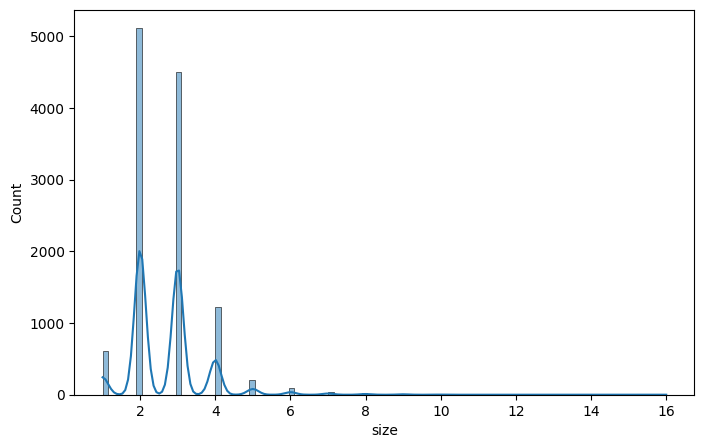

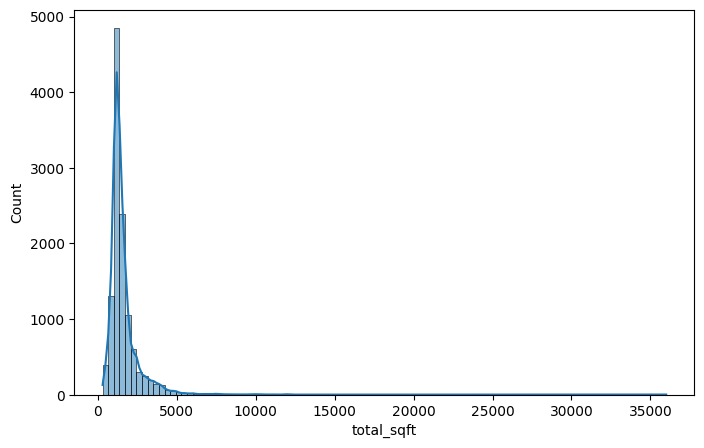

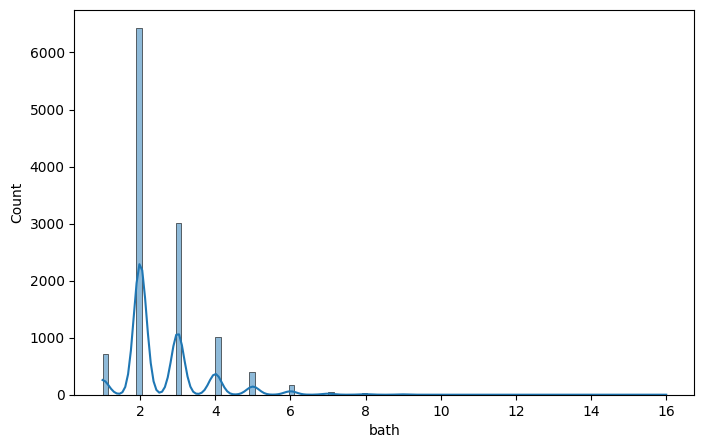

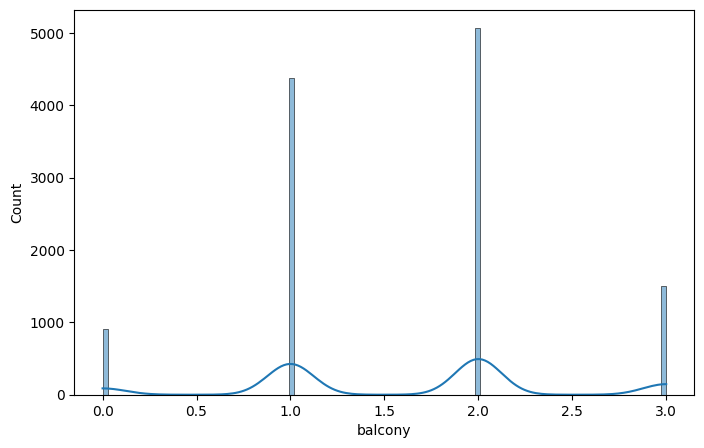

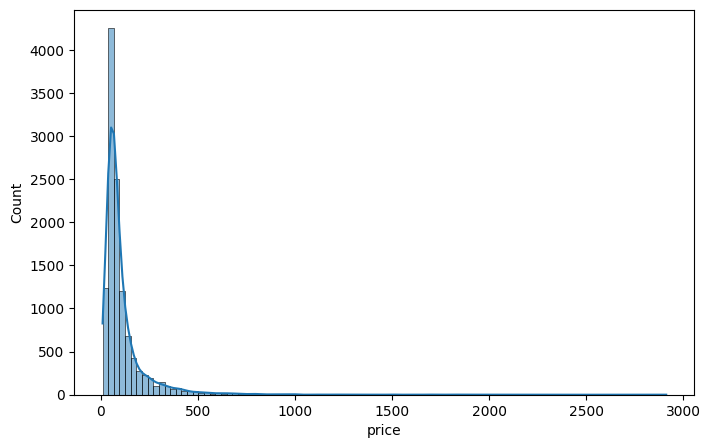

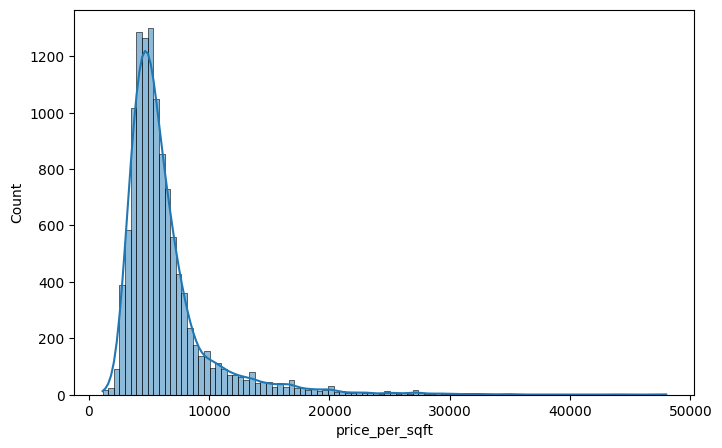

In [43]:
for i in numericals:
    plt.figure(figsize=(8,5))
    sns.histplot(df[i],kde=True,bins=100)

In [44]:
df.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000,11847.000000
mean,2.664219,1596.496466,2.574069,1.605217,112.865406,6340.280121
std,0.988635,1078.906073,1.089400,0.803220,148.169703,3716.435136
min,1.000000,300.000000,1.000000,0.000000,9.000000,1135.581555
25%,2.000000,1118.500000,2.000000,1.000000,50.000000,4252.135917
50%,3.000000,1310.000000,2.000000,2.000000,70.000000,5333.333333
75%,3.000000,1719.000000,3.000000,2.000000,120.000000,6987.764723
max,16.000000,36000.000000,16.000000,3.000000,2912.000000,47994.652406


In [45]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_final=remove_pps_outliers(df)
df_final.shape

(9658, 8)

In [46]:
df_final=df_final.drop(["price_per_sqft"],axis=1)
df_final.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,1st block jayanagar,4.0,2850.0,4.0,1.0,428.0
1,Super built-up Area,1st block jayanagar,3.0,1630.0,3.0,2.0,194.0
2,Super built-up Area,1st block jayanagar,3.0,1875.0,2.0,3.0,235.0
3,Built-up Area,1st block jayanagar,3.0,1200.0,2.0,0.0,130.0
4,Super built-up Area,1st block jayanagar,2.0,1235.0,2.0,2.0,148.0


In [47]:
numericals[:-2]

['size', 'total_sqft', 'bath', 'balcony']

In [48]:
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df_final[numericals[:-2]]),columns=scaler.get_feature_names_out())
scaled_df

,size,total_sqft,bath,balcony
0,1.576140,1.491637,1.537544,-0.767015
1,0.467285,0.126435,0.525991,0.493463
2,0.467285,0.400594,-0.485562,1.753942
3,0.467285,-0.354743,-0.485562,-2.027493
4,-0.641570,-0.315578,-0.485562,0.493463
...,...,...,...,...
9653,0.467285,0.177909,0.525991,0.493463
9654,0.467285,1.103338,0.525991,1.753942
9655,0.467285,0.378214,0.525991,1.753942
9656,0.467285,0.401713,0.525991,1.753942


In [49]:
df_final=df_final.drop(numericals[:-2],axis=1)
df_final

,area_type,location,price
0,Super built-up Area,1st block jayanagar,428.00
1,Super built-up Area,1st block jayanagar,194.00
2,Super built-up Area,1st block jayanagar,235.00
3,Built-up Area,1st block jayanagar,130.00
4,Super built-up Area,1st block jayanagar,148.00
...,...,...,...
9653,Super built-up Area,yeshwanthpur,92.13
9654,Super built-up Area,yeshwanthpur,138.00
9655,Super built-up Area,yeshwanthpur,135.00
9656,Super built-up Area,yeshwanthpur,160.00


In [50]:
df_final=pd.concat([df_final,scaled_df],axis=1)
df_final

,area_type,location,price,size,total_sqft,bath,balcony
0,Super built-up Area,1st block jayanagar,428.00,1.576140,1.491637,1.537544,-0.767015
1,Super built-up Area,1st block jayanagar,194.00,0.467285,0.126435,0.525991,0.493463
2,Super built-up Area,1st block jayanagar,235.00,0.467285,0.400594,-0.485562,1.753942
3,Built-up Area,1st block jayanagar,130.00,0.467285,-0.354743,-0.485562,-2.027493
4,Super built-up Area,1st block jayanagar,148.00,-0.641570,-0.315578,-0.485562,0.493463
...,...,...,...,...,...,...,...
9653,Super built-up Area,yeshwanthpur,92.13,0.467285,0.177909,0.525991,0.493463
9654,Super built-up Area,yeshwanthpur,138.00,0.467285,1.103338,0.525991,1.753942
9655,Super built-up Area,yeshwanthpur,135.00,0.467285,0.378214,0.525991,1.753942
9656,Super built-up Area,yeshwanthpur,160.00,0.467285,0.401713,0.525991,1.753942


In [51]:
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df_final[["area_type","location"]]).toarray()
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoded_df

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st block jayanagar,location_1st phase jp nagar,location_2nd stage nagarbhavi,location_5th block hbr layout,location_5th phase jp nagar,location_6th phase jp nagar,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9654,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9655,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9656,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
df_final=pd.concat([df_final,encoded_df],axis=1)
df_final

,area_type,location,price,size,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,Super built-up Area,1st block jayanagar,428.00,1.576140,1.491637,1.537544,-0.767015,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super built-up Area,1st block jayanagar,194.00,0.467285,0.126435,0.525991,0.493463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Super built-up Area,1st block jayanagar,235.00,0.467285,0.400594,-0.485562,1.753942,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Built-up Area,1st block jayanagar,130.00,0.467285,-0.354743,-0.485562,-2.027493,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Super built-up Area,1st block jayanagar,148.00,-0.641570,-0.315578,-0.485562,0.493463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,Super built-up Area,yeshwanthpur,92.13,0.467285,0.177909,0.525991,0.493463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9654,Super built-up Area,yeshwanthpur,138.00,0.467285,1.103338,0.525991,1.753942,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9655,Super built-up Area,yeshwanthpur,135.00,0.467285,0.378214,0.525991,1.753942,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9656,Super built-up Area,yeshwanthpur,160.00,0.467285,0.401713,0.525991,1.753942,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
df_final=df_final.drop(["location","area_type"],axis=1)

In [54]:
df_final

,price,size,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st block jayanagar,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,428.00,1.576140,1.491637,1.537544,-0.767015,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,194.00,0.467285,0.126435,0.525991,0.493463,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,235.00,0.467285,0.400594,-0.485562,1.753942,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,130.00,0.467285,-0.354743,-0.485562,-2.027493,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,148.00,-0.641570,-0.315578,-0.485562,0.493463,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,92.13,0.467285,0.177909,0.525991,0.493463,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9654,138.00,0.467285,1.103338,0.525991,1.753942,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9655,135.00,0.467285,0.378214,0.525991,1.753942,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9656,160.00,0.467285,0.401713,0.525991,1.753942,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
x=df_final.drop(["price"],axis=1).values
y=df_final["price"].values

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

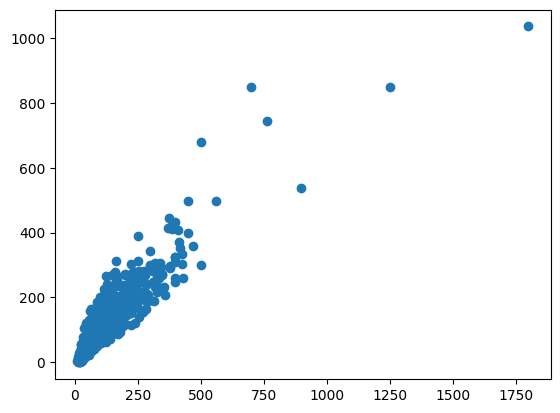

In [58]:
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred)
plt.show()

In [59]:
y_pred

array([ 83.10546875,  45.65039062,  53.95898438, ..., 100.88671875,
       271.27441406,  71.94433594])

In [60]:
y_test

array([ 85.   ,  46.   ,  53.   , ..., 128.   , 200.   ,  40.985])

In [61]:
from sklearn.metrics import r2_score
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
r2 = r2_score(y_test_reshaped, y_pred_reshaped)
r2

0.8366956368872345

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
new_data_point = {
    'location': 'Electronic City Phase II',  # This is a placeholder
    'size': 2,  # This is a placeholder
    'area_type': 'Some Society',  # This is a placeholder
    'total_sqft': 1200,  # This is a placeholder
    'bath': 2,  # This is a placeholder
    'balcony': 1  # This is a placeholder
}

new_data_df = pd.DataFrame([new_data_point])

# One-hot encode the 'location' feature
new_data_location_ohe = encoder.transform(new_data_df[['location']])

# Convert the one-hot encoded location back to a DataFrame
columns = encoder.get_feature_names_out(['location'])
new_data_location_df = pd.DataFrame(new_data_location_ohe.toarray(), columns=columns)

# Concatenate the non-location features with the one-hot encoded location features
new_data_df = new_data_df.drop('location', axis=1)  # Drop the original 'location' column
new_data_prepared = pd.concat([new_data_df.reset_index(drop=True), new_data_location_df], axis=1)

# Predict the price using the trained model
predicted_price = model.predict(new_data_prepared)

print(f"The predicted price for the new data point is: {predicted_price[0]}")


In [62]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test_reshaped, y_pred_reshaped)
mse

1213.8857959146592

score is  0.7667731759853557
MAE 17.953499402910243


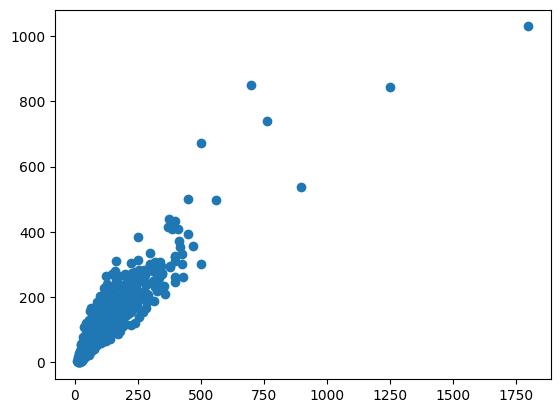

In [63]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train,y_train)
y_pred=ridgecv.predict(x_test)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()


score is  -0.6042009374900388
MAE 26.8510119368706


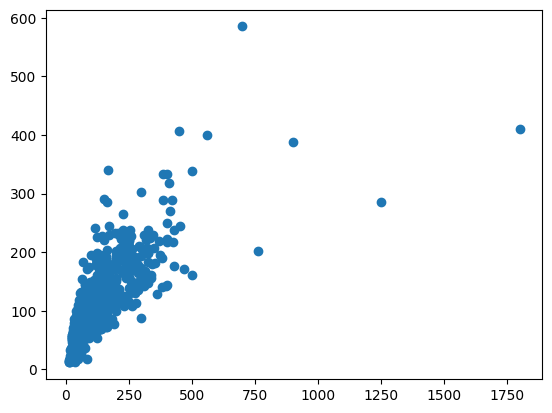

In [64]:
from sklearn.linear_model import ElasticNet
elas=ElasticNet()
elas.fit(x_train,y_train)
y_pred=elas.predict(x_test)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

c:\Users\Vinod Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54748.75936728064, tolerance: 4983.12932563804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Vinod Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1918247.3171210354, tolerance: 4983.12932563804
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Vinod Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2548506.352540246, tolerance: 4983.12932563804
  model = cd_fast.enet_coordinate_de

score is  0.7595990323791459
MAE 17.92313727734562


c:\Users\Vinod Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.757e+06, tolerance: 5.714e+03
  model = cd_fast.enet_coordinate_descent(


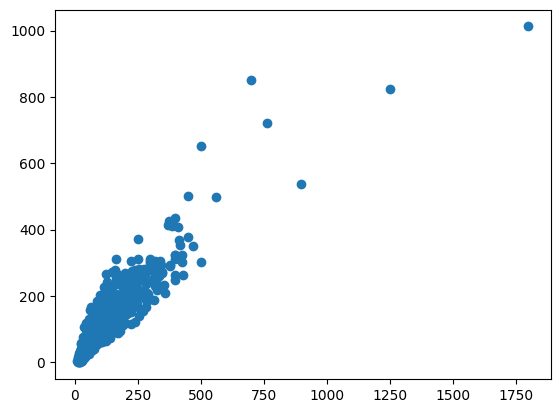

In [65]:
from sklearn.linear_model import ElasticNetCV
elascv=ElasticNetCV(cv=7,alphas=np.logspace(-6, 6, 13))
elascv.fit(x_train,y_train)
y_pred=elascv.predict(x_test)
print("score is ",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()